# K Nearest Neighbours (KNN)

In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt
from collections import Counter
import os

## 1. Simple Example of KNN

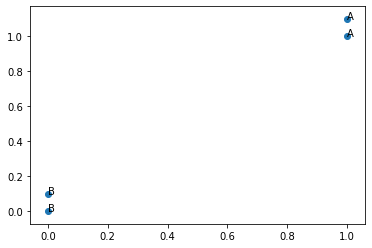

In [2]:
group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
labels = ['A','A','B','B']
fig,ax = plt.subplots()
ax.scatter(group[:,0],group[:,1])
for i in range(4):
    ax.text(group[i,0],group[i,1],labels[i])

In [3]:
def classify0(subject, dataset, labels, k):
    '''To determine which label subject belongs to'''
    m = dataset.shape[0]
    distance = np.tile(subject,(m,1)) - dataset
    distance = ((distance**2).sum(axis = 1))**0.5
    distance_rank = distance.argsort()
    #argsort-> [0]:index of smallest, [1]:index of 2nd samllest
    nn_labels = [labels[i] for i in distance_rank[:k]]
    return Counter(nn_labels).most_common(1)[0][0]

In [4]:
classify0([0,0], group, labels, 3)

'B'

## 2. Date Data Model
### 2.1 Data Loading

Text(0.5, 1.0, 'Loving Index vs Game and Ice-cream')

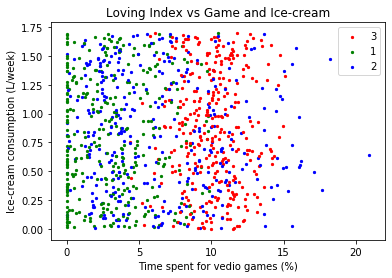

In [5]:
all_date_data = []
with open('datingTestSet2.txt') as file:
    text = file.readlines()
    for line in text:
        line = line.strip()
        line = line.split()
        all_date_data.append([float(num) for num in line])
all_date_data = np.array(all_date_data)
date_data = all_date_data[:,:3]
date_label = all_date_data[:,3]

colors = ['r','b','g']
fig1,ax1 = plt.subplots()
for i in range(len(date_label)):
    color = colors[int(date_label[i]%3)]
    ax1.scatter(date_data[i,1],date_data[i,2], s=5, color=color)
ax1.set_xlabel('Time spent for vedio games (%)')
ax1.set_ylabel('Ice-cream consumption (L/week)')
ax1.legend([3,1,2])
ax1.set_title('Loving Index vs Game and Ice-cream')

Text(0.5, 1.0, 'Loving Index vs Flight and Game')

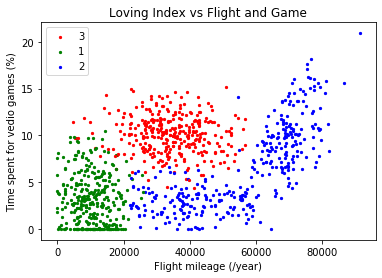

In [6]:
colors = ['r','b','g']
fig2,ax2 = plt.subplots()
for i in range(len(date_label)):
    color = colors[int(date_label[i]%3)]
    ax2.scatter(date_data[i,0],date_data[i,1], s=5, color=color)
ax2.set_ylabel('Time spent for vedio games (%)')
ax2.set_xlabel('Flight mileage (/year)')
ax2.legend([3,1,2])
ax2.set_title('Loving Index vs Flight and Game')

### 2.2 Normalization
Each feature first subtracted by the minimal value, then devided by the range of it.

In [7]:
def auto_norm(dataset):
    maxvals = dataset.max(axis = 0)
    minvals = dataset.min(axis = 0)
    rangevals = maxvals - minvals
    minvals = np.tile(minvals,(dataset.shape[0],1))
    rangevals = np.tile(rangevals,(dataset.shape[0],1))
    normdata = (dataset - minvals)/rangevals
    return normdata, minvals[0,:], rangevals[0,:]

In [8]:
norm_date_data,minvals,rangevals = auto_norm(date_data)
norm_date_data[:5,:]

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       [0.82320073, 0.62848007, 0.25248929],
       [0.42010233, 0.07982027, 0.0785783 ]])

### 2.3 Algorithm Test
Use 90% of records for model training, and use the other 10% for validation. 

In [9]:
def class_test(dataset, labels, ratio):
    m = int(dataset.shape[0]*(1-ratio))
    error = 0
    for i in range(m,dataset.shape[0]):
        predict = classify0(dataset[i], dataset[:m], labels[:m], 3)
        if predict != labels[i]:
            error += 1
    error_rate = error/(dataset.shape[0]-m)*100
    message = 'The error rate is %f%%'%(error_rate)
    return message

In [10]:
class_test(norm_date_data, date_label, 0.1)

'The error rate is 6.000000%'

## 3. Digits Classifier

In [11]:
def transform(directory):
    files = os.listdir(directory)
    dataset = []
    labels = []
    for file in files:
        label = int(file[0])
        labels.append(label)
        path = directory + '/' + file
        with open(path) as f:
            data = []
            content = f.readlines()
            for line in content:
                line = line.strip()
                for char in line:
                    char = int(char)
                    data.append(char)
            dataset.append(data)
    dataset = np.array(dataset)
    return dataset, labels

In [12]:
training_dir = 'D:/Vincent_WANG/python_work/AI_Learning/KNN/trainingDigits'
test_dir = 'D:/Vincent_WANG/python_work/AI_Learning/KNN/testDigits'

training_data, training_labels = transform(training_dir)
test_data, test_labels = transform(test_dir)

In [13]:
error = 0
for i in range(len(test_labels)):
    label = classify0(test_data[i], training_data, training_labels, 3)
    if label != test_labels[i]:
        error += 1
print('The error rate is %f%%'%(error*100/len(test_labels)))

The error rate is 1.057082%
